In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\SAGAR\\Downloads\\Data Science\\Bike _Rental_Count")

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df["day"] = [t.day for t in pd.DatetimeIndex(df.dteday)]
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [7]:
df = df.drop(["instant","dteday"], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [7]:
missing_val = pd.DataFrame(df.isna().sum())
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


## Cleaning of training data and Exploratory Data Analysis

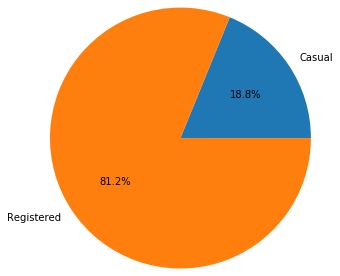

In [14]:
#first of all, let us see how many casual and registered users rent bike
labels = 'Casual', 'Registered'
sizes = [np.mean(df['casual']), np.mean(df['registered'])]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,radius=1.5)
plt.show()

There are many registered users as compared to casual user. This means that maximum user base of bike renting service
consists of registerd users 

In [19]:
df['log_cnt']=np.log(df['cnt'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,log_cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,6.892642
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,6.685861
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,7.207119
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,7.353722
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,7.377759


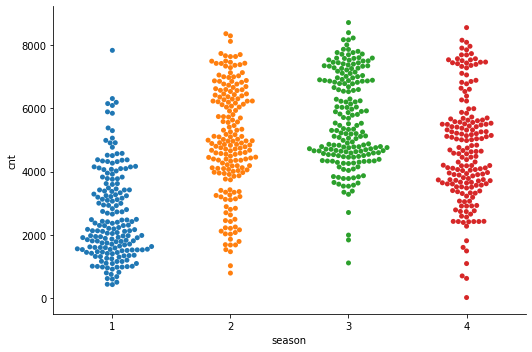

In [40]:
#We will now see how the user count is affected by seasons (Note: 1:Spring ; 2:Summer ; 3:Fall ; 4:Winter)
sns.catplot(x='season',y='cnt',data=df,kind='swarm',height=5,aspect=1.5)

Count for all seasons is mostly the same. The count is highest for Fall Season.

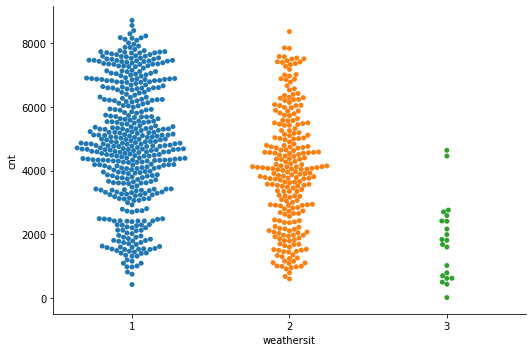

In [52]:
#We will now see how the user count is affected by weather (Note: 1:Clear ; 2:Mist ; 3:Rain ; 4:Heavy Rain)
sns.catplot(x='weathersit',y='cnt',data=df,kind='swarm',height=5,aspect=1.5)

As expected, maximum count is for clear weather and it decreases as weather worsens. Note that there are no records 
for 4th category of weather (i.e. Heavy Rain) in the dataset.

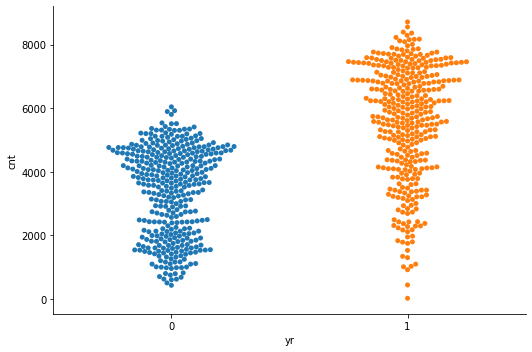

In [42]:
#How year affects the count [Note: 0:2011 ; 1:2012]
sns.catplot(x='yr',y='cnt',data=df,kind='swarm',height=5,aspect=1.5)

Counts for both years (2011 and 2012) are almost equal 

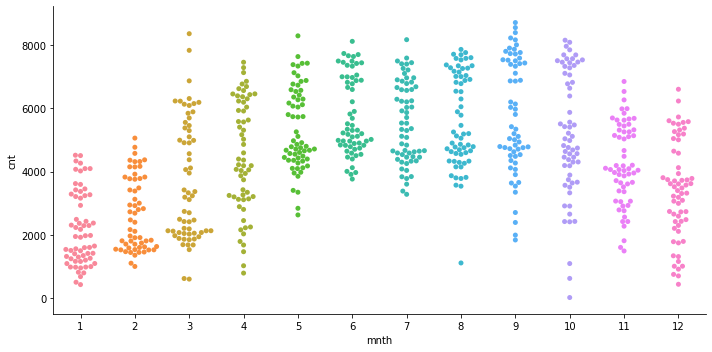

In [47]:
#How month affects the count 
sns.catplot(x='mnth',y='cnt',data=df,kind='swarm',height=5,aspect=2)

Not much variation in the count over the months

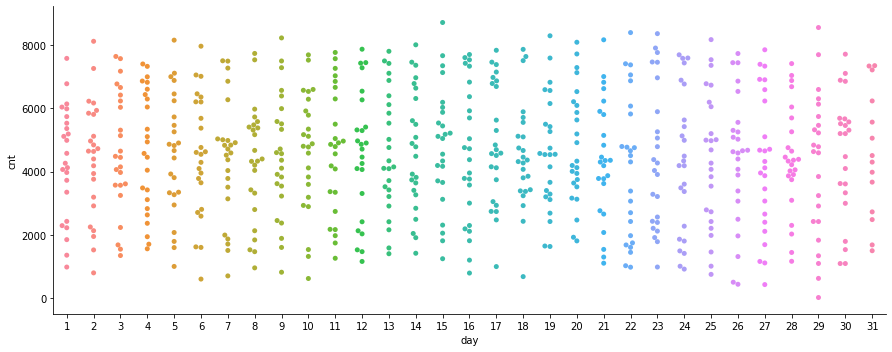

In [46]:
#How date affects the count 
sns.catplot(x='day',y='cnt',data=df,kind='swarm',height=5,aspect=2.5)

Rental count reduces for the days of month-end. Apart from that, the count is consistent over all the days of the month. 

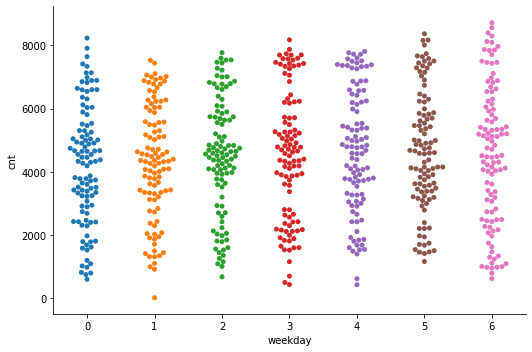

In [48]:
#How day of week affects the count 
sns.catplot(x='weekday',y='cnt',data=df,kind='swarm',height=5,aspect=1.5)

The count seems almost consistent throught the week

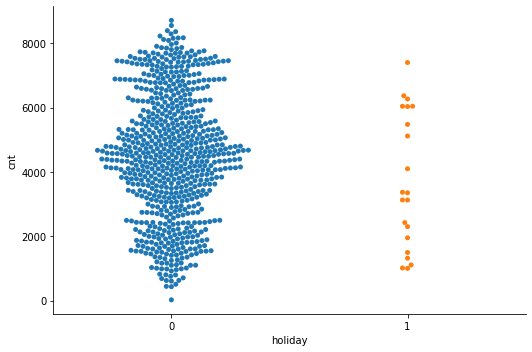

In [49]:
#How holiday affects the count [Note: 0:Not Holiday ; 1:Holiday] 
sns.catplot(x='holiday',y='cnt',data=df,kind='swarm',height=5,aspect=1.5)

As we can see, most people rent bike when there isn't a holiday on that day

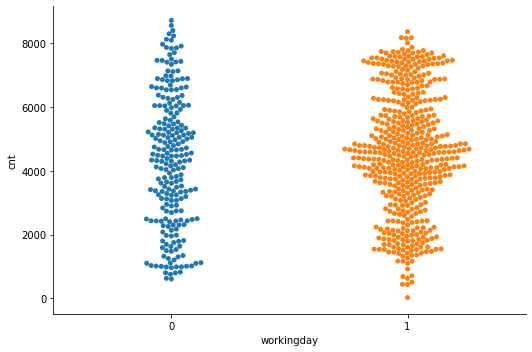

In [50]:
#How working day affects count [Note: 0:Holiday ; 1: neither weekend nor holiday]
sns.catplot(x='workingday',y='cnt',data=df,kind='swarm',height=5,aspect=1.5)

Most people rent bike during working days (typically Monday - Friday)

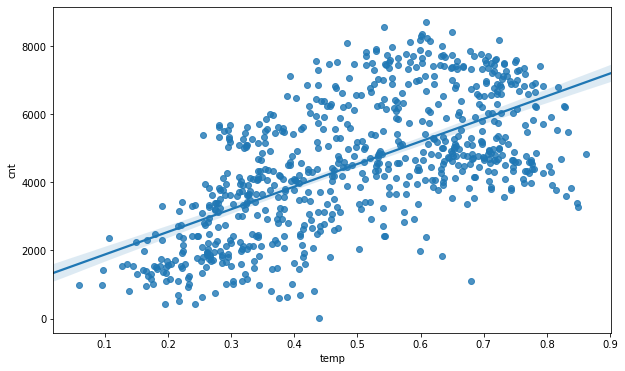

In [52]:
#Now we observe how continuous variables affect our count variable
size=(10,6)
fig, ax = plt.subplots(figsize=size)
sns.regplot(x="temp", y="cnt", data=df,ax=ax)

We can see a somewhat linear pattern of variation of count with temperature. (If we denormalize temperature, we find that 
maximum rental count is between 26.6 - 32.8 degC  )

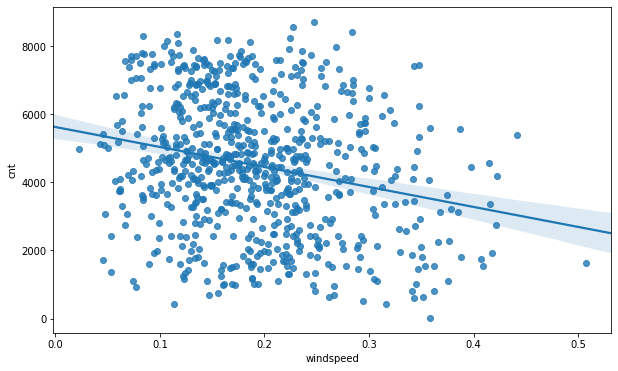

In [53]:
size=(10,6)
fig, ax = plt.subplots(figsize=size)
sns.regplot(x="windspeed", y="cnt", data=df,ax=ax)

There isn't a strong pattern but, overall trend suggest a negatively linear pattern. As windspeed increases, count decreases.

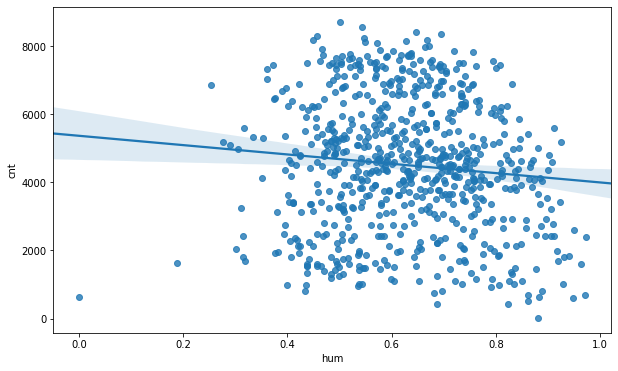

In [54]:
size=(10,6)
fig, ax = plt.subplots(figsize=size)
sns.regplot(x="hum", y="cnt", data=df,ax=ax)

Again, there isn't any strong pattern, but for higher humidity values, count decreases slightly.

In [58]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [61]:
df=df[cols]

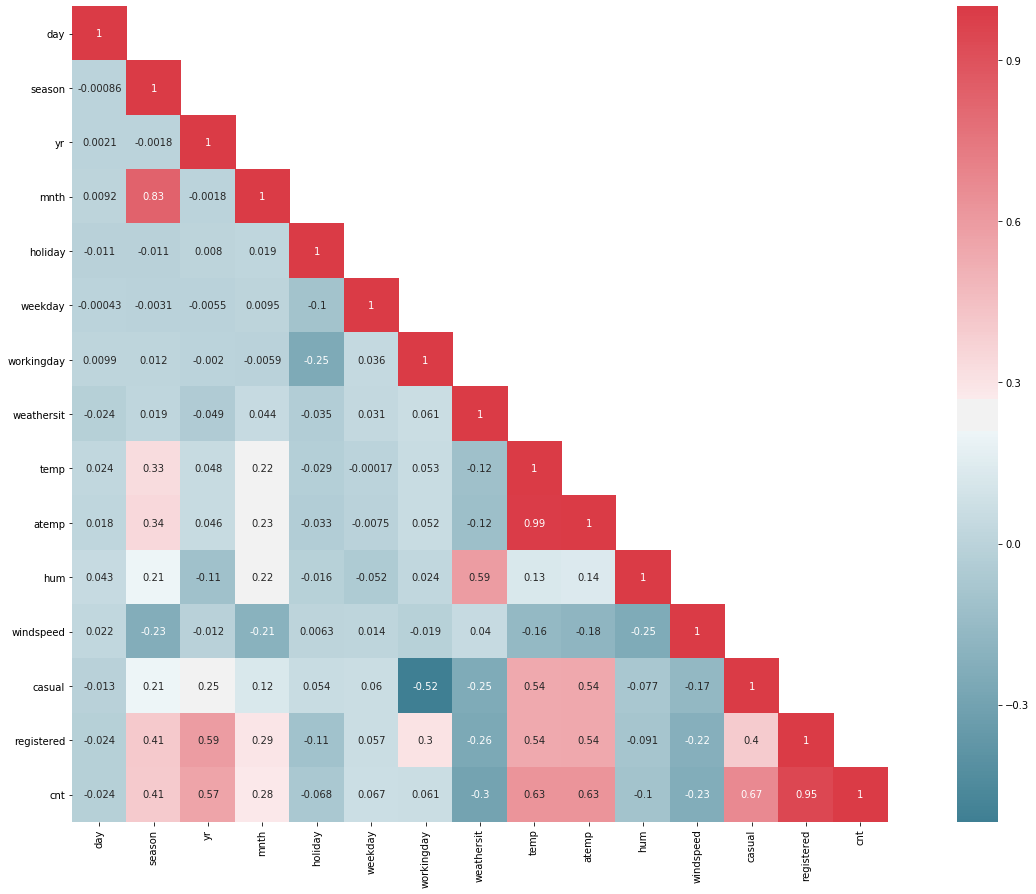

In [62]:
plt.figure(figsize=(25,15))

df_corr=df.loc[:,:]
cor_mat = df_corr.corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(cor_mat, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True,cbar=True)

Since atemp and temp carry same info, it is better to remove either of them. Also, count is basically sum of casual 
and registered, so it is better that we remove them as our aim is to determine the final counts. 

In [66]:
df = df.drop(["atemp","casual","registered"], axis=1)
df.head()

,day,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [68]:
#Creating dummy variables for seasons
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()

,day,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4
0,1,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1,0,0,0
1,2,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1,0,0,0
2,3,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,1,0,0,0
3,4,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,1,0,0,0
4,5,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,1,0,0,0


In [69]:
#Creating dummy variables for weather
weather=pd.get_dummies(df['weathersit'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()

,day,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,1,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,0
1,2,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,0
2,3,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,0
3,4,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,0
4,5,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,0


In [70]:
df = df.drop(["weathersit","season"], axis=1)
df.head()

,day,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,1,0,1,0,6,0,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,0
1,2,0,1,0,0,0,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,0
2,3,0,1,0,1,1,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,0
3,4,0,1,0,2,1,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,0
4,5,0,1,0,3,1,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,0


In [72]:
cols= ['cnt','temp','hum','windspeed','yr','mnth','day','weekday','holiday','workingday','season_1', 'season_2',
       'season_3','season_4','weather_1','weather_2','weather_3']
df=df[cols]

In [74]:
df.head()

,cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,985,0.344167,0.805833,0.160446,0,1,1,6,0,0,1,0,0,0,0,1,0
1,801,0.363478,0.696087,0.248539,0,1,2,0,0,0,1,0,0,0,0,1,0
2,1349,0.196364,0.437273,0.248309,0,1,3,1,0,1,1,0,0,0,1,0,0
3,1562,0.200000,0.590435,0.160296,0,1,4,2,0,1,1,0,0,0,1,0,0
4,1600,0.226957,0.436957,0.186900,0,1,5,3,0,1,1,0,0,0,1,0,0


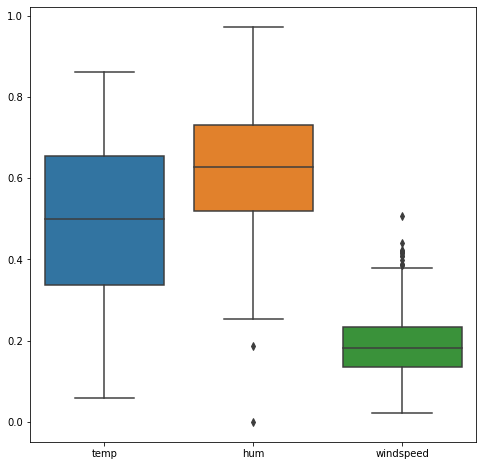

In [124]:
sns.boxplot(data=df[['temp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [134]:
q75, q25 = np.percentile(df['hum'], [75,25])

# #Calculate IQR
iqr = q75 - q25

##Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

# #Replace with NA
df.loc[df['hum'] < minimum,:] 

,cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
49,1635,0.399167,0.187917,0.507463,0,2,19,6,0,0,1,0,0,0,1,0,0
68,623,0.389091,0.000000,0.261877,0,3,10,4,0,1,1,0,0,0,0,0,1


In [135]:
df2=df.copy()

In [136]:
df2.loc[df2['hum'] < minimum,'hum':'hum']=np.nan

In [137]:
q75, q25 = np.percentile(df['windspeed'],[75,25])

# #Calculate IQR
iqr = q75 - q25

##Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

# #Replace with NA
df2.loc[df2['windspeed'] > maximum,:]

,cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
44,1913,0.415000,0.375833,0.417908,0,2,14,1,0,1,1,0,0,0,1,0,0
49,1635,0.399167,NaN,0.507463,0,2,19,6,0,0,1,0,0,0,1,0,0
93,3115,0.573333,0.426250,0.385571,0,4,4,1,0,1,0,1,0,0,1,0,0
94,1795,0.414167,0.642083,0.388067,0,4,5,2,0,1,0,1,0,0,0,1,0
292,4195,0.475833,0.636250,0.422275,0,10,20,4,0,1,0,0,0,1,1,0,0
382,3376,0.303333,0.443333,0.415429,1,1,18,3,0,1,1,0,0,0,1,0,0
407,1529,0.127500,0.464583,0.409212,1,2,12,0,0,0,1,0,0,0,1,0,0
420,2732,0.290833,0.395833,0.421642,1,2,25,6,0,0,1,0,0,0,1,0,0
432,5382,0.527500,0.567500,0.441563,1,3,8,4,0,1,1,0,0,0,1,0,0
433,4569,0.410833,0.407083,0.414800,1,3,9,5,0,1,1,0,0,0,0,1,0


In [138]:
df2.loc[df2['windspeed'] > maximum,'windspeed':'windspeed']=np.nan

In [139]:
missing_val = pd.DataFrame(df2.isna().sum())
missing_val

,0
cnt,0
temp,0
hum,2
windspeed,13
yr,0
mnth,0
day,0
weekday,0
holiday,0
workingday,0


In [140]:
from missingpy import MissForest
imputer = MissForest()
df2 = imputer.fit_transform(df2)

Iteration: 0
Iteration: 1
Iteration: 2


Imputing the missing values using MissForest library which is a Random Forest Regressor based imputer.

In [141]:
df2=pd.DataFrame(df2)

In [144]:
df3=df2.copy()

In [145]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,985.0,0.344167,0.805833,0.160446,0.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,801.0,0.363478,0.696087,0.248539,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1349.0,0.196364,0.437273,0.248309,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1562.0,0.200000,0.590435,0.160296,0.0,1.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1600.0,0.226957,0.436957,0.186900,0.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [146]:
df3.columns=cols
df3.head()

,cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,985.0,0.344167,0.805833,0.160446,0.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,801.0,0.363478,0.696087,0.248539,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1349.0,0.196364,0.437273,0.248309,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1562.0,0.200000,0.590435,0.160296,0.0,1.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1600.0,0.226957,0.436957,0.186900,0.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [147]:
df3.describe()

,cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,4504.348837,0.495385,0.629515,0.187239,0.500684,6.519836,15.738714,2.997264,0.028728,0.683995,0.247606,0.251710,0.257182,0.243502,0.633379,0.337893,0.028728
std,1937.211452,0.183051,0.140025,0.071614,0.500342,3.451913,8.809949,2.004787,0.167155,0.465233,0.431917,0.434293,0.437380,0.429489,0.482212,0.473316,0.167155
min,22.000000,0.059130,0.254167,0.022392,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3152.000000,0.337083,0.521041,0.134950,0.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4548.000000,0.498333,0.627500,0.179729,1.000000,7.000000,16.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5956.000000,0.655417,0.730833,0.232783,1.000000,10.000000,23.000000,5.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,8714.000000,0.861667,0.972500,0.378108,1.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


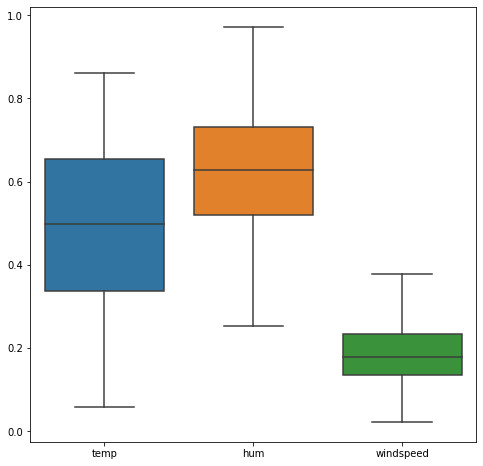

In [148]:
#All outliers are taken care of
sns.boxplot(data=df3[['temp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(8,8)

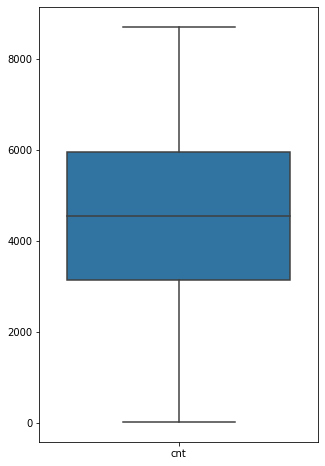

In [150]:
#Lets check outliers for count variable
sns.boxplot(data=df3[['cnt']])
fig=plt.gcf()
fig.set_size_inches(5,8)

No outliers in the count variable

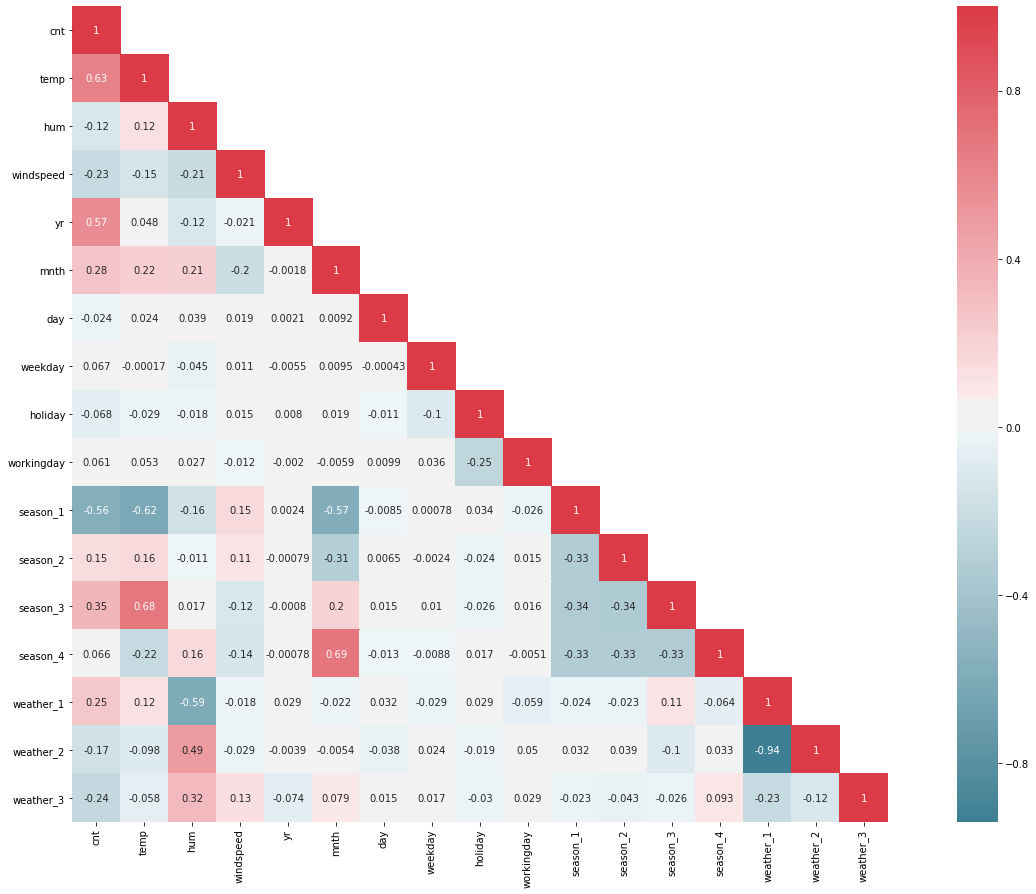

In [44]:
plt.figure(figsize=(25,15))

df_corr=df3.loc[:,:]
cor_mat = df_corr.corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(cor_mat, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True,cbar=True)

In [151]:
df3.to_csv('data.csv',index=False)

## Modelling and Count Prediction

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [5]:
df3=pd.read_csv("data.csv")

In [6]:
df3.head()

,cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,985.0,0.344167,0.805833,0.160446,0.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,801.0,0.363478,0.696087,0.248539,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1349.0,0.196364,0.437273,0.248309,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1562.0,0.200000,0.590435,0.160296,0.0,1.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1600.0,0.226957,0.436957,0.186900,0.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
#Sepearating our training data into training and validation data

from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, test_size=0.2,random_state=23)

In [23]:
cols1=['temp','hum','windspeed','yr','mnth','day','weekday','holiday','workingday','season_1', 'season_2',
       'season_3','season_4','weather_1','weather_2','weather_3']

y=train['cnt']
valid=test['cnt']
X_train=train[cols1]
X_test=test[cols1]

In [24]:
X_train.shape

(584, 16)

In [25]:
X_test.shape

(147, 16)

In [26]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred)
    rmse=np.sqrt(mse)
    rmsle=np.sqrt(metrics.mean_squared_log_error(y_true, y_pred))
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    
    #calculating AIC
    resid = y_true - y_pred
    sse = sum(resid**2)
    k=11
    n=len(y_pred)

    AIC = 2*k + n*np.log(sse/n)
   
    #print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    #print('MAE: ', round(mean_absolute_error,4))
    print('MAPE: ', round(mape,4))
    #print('MSE: ', round(mse,4))
    print('RMSE: ', round(rmse,4))
    print('RMSLE: ', round(rmsle,4))
    print('AIC: ', round(AIC,4))

### Random Forest Regression

In [27]:
model=RandomForestRegressor(n_estimators=200)
model.fit(X_train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
pred=model.predict(X_train)
regression_results(y,pred)

r2:  0.9833
MAPE:  19.375
RMSE:  251.1437
RMSLE:  0.2046
AIC:  6476.3973


In [29]:
pred=model.predict(X_test)
regression_results(valid,pred)

r2:  0.8699
MAPE:  20.0337
RMSE:  686.7674
RMSLE:  0.2762
AIC:  1942.4067


### AdaBoost Regression

In [30]:
model=AdaBoostRegressor()
model.fit(X_train,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [31]:
pred=model.predict(X_train)
regression_results(y,pred)

r2:  0.8593
MAPE:  24.1511
RMSE:  728.5618
RMSLE:  0.2751
AIC:  7720.3726


In [32]:
pred=model.predict(X_test)
regression_results(valid,pred)

r2:  0.7966
MAPE:  27.3283
RMSE:  858.6174
RMSLE:  0.3319
AIC:  2008.0651


### Bagging Regression

In [33]:
model=BaggingRegressor()
model.fit(X_train,y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [34]:
pred=model.predict(X_train)
regression_results(y,pred)

r2:  0.9771
MAPE:  10.32
RMSE:  293.6559
RMSLE:  0.1696
AIC:  6659.0532


In [35]:
pred=model.predict(X_test)
regression_results(valid,pred)

r2:  0.8418
MAPE:  21.376
RMSE:  757.2221
RMSLE:  0.2867
AIC:  1971.1191


### K Nearest Neighbours (KNN) Regression

In [36]:
model=KNeighborsRegressor()
model.fit(X_train,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [37]:
pred=model.predict(X_train)
regression_results(y,pred)

r2:  0.6081
MAPE:  50.2343
RMSE:  1215.9349
RMSLE:  0.3926
AIC:  8318.6177


In [38]:
pred=model.predict(X_test)
regression_results(valid,pred)

r2:  0.3595
MAPE:  51.3265
RMSE:  1523.5853
RMSLE:  0.495
AIC:  2176.6735


### Light Gradient Boosting

In [39]:
import lightgbm as lgbm
params = {
         'boosting_type':'gbdt',
         'objective': 'regression',
         'nthread': -1,
         'verbose': 0,
         'num_leaves': 31,
         'learning_rate': 0.05,
         'max_depth': -1,
         'subsample': 0.8,
         'subsample_freq': 1,
         'colsample_bytree': 0.6,
         'reg_aplha': 1,
         'reg_lambda': 0.001,
         'metric': 'rmse',
         'min_split_gain': 0.5,
         'min_child_weight': 1,
         'min_child_samples': 10,
         'scale_pos_weight':1   
    }

In [40]:
pred_test_y = np.zeros(X_test.shape[0])

In [41]:
train_set = lgbm.Dataset(X_train,y, silent=True)
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [42]:
#On train data
pred_test_y = model.predict(X_train, num_iteration = model.best_iteration)
regression_results(pred_test_y,y)

r2:  0.9951
MAPE:  2.6232
RMSE:  134.6985
RMSLE:  0.1778
AIC:  5748.7494


In [43]:
#On test data
pred_test_y = model.predict(X_test, num_iteration = model.best_iteration)
regression_results(pred_test_y,valid)

r2:  0.8694
MAPE:  12.172
RMSE:  618.6397
RMSLE:  0.2418
AIC:  1911.6918


### Xtreme gradient Boost 

In [44]:
import xgboost as xgb 
dtrain = xgb.DMatrix(X_train, label=y)
dtest = xgb.DMatrix(X_test)

E:\Software_Installed\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
E:\Software_Installed\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [45]:
params = {'max_depth':7,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

xb = xgb.train(params, dtrain, num_rounds)

In [46]:
#Prediction on train data
y_pred_xgb = xb.predict(dtrain)
regression_results(y_pred_xgb,y)

r2:  0.9126
MAPE:  9.6451
RMSE:  511.7337
RMSLE:  0.1047
AIC:  7307.7556


In [48]:
#Prediction on test data
y_pred_xgb = xb.predict(dtest)
regression_results(y_pred_xgb,valid)

r2:  0.7367
MAPE:  18.5908
RMSE:  825.9434
RMSLE:  0.2775
AIC:  1996.6587


In [49]:
model_df = pd.DataFrame({'Model': ['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor','LightGBM','XGBoost'], 
                         'RMSLE_train': [0.2046,0.2751,0.1696,0.3926,0.1778,0.1047], 
                         'RMSLE_valid': [0.2762,0.3319,0.2867,0.495,0.2418,0.2775]})

In [50]:
model_df

,Model,RMSLE_train,RMSLE_valid
0,RandomForestRegressor,0.2046,0.2762
1,AdaBoostRegressor,0.2751,0.3319
2,BaggingRegressor,0.1696,0.2867
3,KNeighborsRegressor,0.3926,0.4950
4,LightGBM,0.1778,0.2418
5,XGBoost,0.1047,0.2775


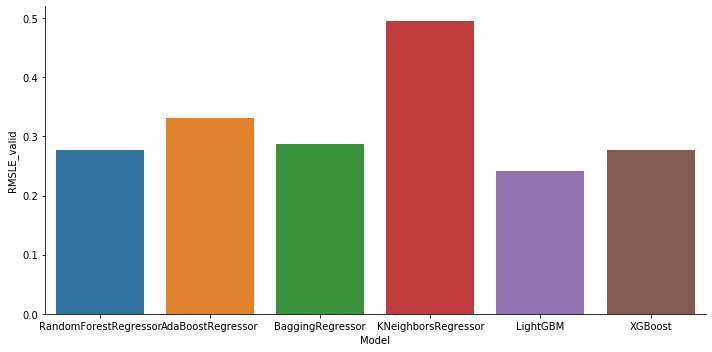

In [51]:
sns.catplot(x='Model',y='RMSLE_valid',data=model_df,kind='bar',height=5,aspect=2)

As we can see, LightGBM has the least RMSLE and least variance between train and test data
Now, lets fine tune our best model using Grid Search

In [59]:
#for LGBM regresion.
from sklearn.model_selection import GridSearchCV
parameters = {
         'boosting_type':['gbdt','dart'],
         'max_depth': [1,3,5,10,15],
         'num_leaves': [25,28,31,35,40],
         'learning_rate': [0.03,0.04,0.05,0.075],
         'subsample': [0.8,0.9],
         'subsample_freq': [1,5,8]
         }

lgboost = lgbm.LGBMRegressor()

grid_search = GridSearchCV(estimator = lgboost, param_grid = parameters,cv = 2, verbose = 2)
grid_search = grid_search.fit(X_train,y)
grid_search.best_params_

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=1 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=1, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=1 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=1, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=5 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=5, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=5 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.8, subsample_freq=5, total=   0.0s
[CV] boosting_type=gbdt, le

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=1 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=1, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=5 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=5, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=5 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=5, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=8 
[CV]  boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, subsample_freq=8, total=   0.0s
[CV] boosting_type=gbdt, learning_rate=0.03, max_depth=1, num_leaves=25, subsample=0.9, sub

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  1.5min finished


{'boosting_type': 'gbdt',
 'learning_rate': 0.075,
 'max_depth': 5,
 'num_leaves': 25,
 'subsample': 0.9,
 'subsample_freq': 1}

In [75]:
params = {
         'boosting_type':'gbdt',
         'objective': 'regression',
         'nthread': -1,
         'verbose': 0,
         'num_leaves': 25,
         'learning_rate': 0.075,
         'max_depth': 5,
         'subsample': 0.9,
         'subsample_freq': 1,
         'colsample_bytree': 0.6,
         'reg_aplha': 1,
         'reg_lambda': 0.001,
         'metric': 'rmse',
         'min_split_gain': 0.5,
         'min_child_weight': 1,
         'min_child_samples': 10,
         'scale_pos_weight':1   
    }

In [76]:
pred_test_y = np.zeros(X_test.shape[0])

In [77]:
train_set = lgbm.Dataset(X_train,y, silent=True)
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [78]:
#On train data
pred_test_y = model.predict(X_train, num_iteration = model.best_iteration)
regression_results(pred_test_y,y)

r2:  0.9905
MAPE:  3.9549
RMSE:  186.2511
RMSLE:  0.1498
AIC:  6127.2481


In [79]:
#On test data
pred_test_y = model.predict(X_test, num_iteration = model.best_iteration)
regression_results(pred_test_y,valid)

r2:  0.8721
MAPE:  12.5162
RMSE:  626.5473
RMSLE:  0.2398
AIC:  1915.4259


By fine tuning our LGBM model we reduced our RMSLE from 0.2418 to 0.2398 on validation data. Thus, we will use LGBM for predicting our sample cases. 

In [ ]:
#Creating test dataset

In [95]:
test = pd.DataFrame({ 'temp':[0.4576,0.5476,0.8976,0.3545,0.2354],
                         'hum':[0.3234,0.3424,0.7566,0.7567,0.8979],
                         'windspeed':[0.2132,0.1323,0.3222,0.3131,0.1233],
                         'yr':[1,0,0,1,0],
                         'mnth':[7,11,10,11,4],
                         'day':[4,27,21,15,9],
                         'weekday':[1,5,6,6,4],
                         'holiday':[1,0,0,1,0],
                         'workingday':[0,0,1,0,1],
                         'season_1':[1,0,0,0,0], 
                         'season_2':[0,1,0,0,0],
                         'season_3':[0,0,1,0,0],
                         'season_4':[0,0,0,0,1],
                         'weather_1':[0,1,0,1,0],
                         'weather_2':[1,0,0,0,1],
                         'weather_3':[0,0,1,0,0],
                         })

In [96]:
test.head()

,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,0.4576,0.3234,0.2132,1,7,4,1,1,0,1,0,0,0,0,1,0
1,0.5476,0.3424,0.1323,0,11,27,5,0,0,0,1,0,0,1,0,0
2,0.8976,0.7566,0.3222,0,10,21,6,0,1,0,0,1,0,0,0,1
3,0.3545,0.7567,0.3131,1,11,15,6,1,0,0,0,0,0,1,0,0
4,0.2354,0.8979,0.1233,0,4,9,4,0,1,0,0,0,1,0,1,0


In [97]:
pred_test_y = model.predict(test, num_iteration = model.best_iteration)

In [98]:
pred_test_y=pd.DataFrame(pred_test_y)

In [99]:
test['Pred_cnt']=pred_test_y

In [100]:
test['Pred_cnt']= test['Pred_cnt'].astype(int)

In [101]:
test

,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,Pred_cnt
0,0.4576,0.3234,0.2132,1,7,4,1,1,0,1,0,0,0,0,1,0,4585
1,0.5476,0.3424,0.1323,0,11,27,5,0,0,0,1,0,0,1,0,0,5063
2,0.8976,0.7566,0.3222,0,10,21,6,0,1,0,0,1,0,0,0,1,2929
3,0.3545,0.7567,0.3131,1,11,15,6,1,0,0,0,0,0,1,0,0,3875
4,0.2354,0.8979,0.1233,0,4,9,4,0,1,0,0,0,1,0,1,0,2414


In [102]:
cols = test.columns.tolist()
cols = cols[-1:] + cols[:-1]
test=test[cols]

In [103]:
test

,Pred_cnt,temp,hum,windspeed,yr,mnth,day,weekday,holiday,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3
0,4585,0.4576,0.3234,0.2132,1,7,4,1,1,0,1,0,0,0,0,1,0
1,5063,0.5476,0.3424,0.1323,0,11,27,5,0,0,0,1,0,0,1,0,0
2,2929,0.8976,0.7566,0.3222,0,10,21,6,0,1,0,0,1,0,0,0,1
3,3875,0.3545,0.7567,0.3131,1,11,15,6,1,0,0,0,0,0,1,0,0
4,2414,0.2354,0.8979,0.1233,0,4,9,4,0,1,0,0,0,1,0,1,0


Thus, our LGBM model predicts the bike rental count on user generated data